In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#np.random.seed(10)

m = 50
M = 1
epsilon = 0.1
noise_std = 0.5
resample_freq = 50
t = 15000
C = 0.3
B_hat = 0.1 
noise_std = np.sqrt(2 * (C - B_hat) * epsilon)

theta_init = 1.0
r_init = 0 #np.random.normal(0, np.sqrt(M))

HMC_theta, naive_theta, naive_resampled_theta, sghmc_theta = theta_init, theta_init, theta_init, theta_init
HMC_r, naive_r, naive_resampled_theta, sghmc_r = r_init, r_init, r_init, r_init


In [4]:
def U(theta):
    return theta**2 / 2

def grad_U(theta):
    return theta

def noisy_grad_U(theta):
    noise = np.random.normal(0, noise_std)
    return theta + noise


## Hamiltonean dynamics

In [5]:
HMC_theta_samples = []
HMC_r_samples = []

for i in range(t):

    HMC_r -= (epsilon/2)*grad_U(HMC_theta)

    for j in range(m):
        HMC_theta += epsilon*(1/M)*HMC_r
        HMC_r -= epsilon*grad_U(HMC_theta)
    
    HMC_r -= (epsilon/2)*grad_U(HMC_theta)


    HMC_theta_samples.append(HMC_theta)
    HMC_r_samples.append(HMC_r)

## Noisy Hamiltonean dynamics

In [6]:
naive_theta_samples = []
naive_r_samples = []

for i in range(t):

    naive_r -= (epsilon/2)*noisy_grad_U(naive_theta)

    for j in range(m):
        naive_theta += epsilon*(1/M)*naive_r
        naive_r -= epsilon*noisy_grad_U(naive_theta)
    
    naive_r -= (epsilon/2)*noisy_grad_U(naive_theta)


    naive_theta_samples.append(naive_theta)
    naive_r_samples.append(naive_r)

## Noisy hamitonean dynamics, resampling r every 50 steps

In [7]:
naive_resampled_theta_samples = []
naive_resampled_r_samples = []

for i in range(t):

    # Resample r every 50 steps
    if i % resample_freq == 0:
        naive_resampled_r = np.random.normal(0, np.sqrt(M))

    naive_resampled_r -= (epsilon/2)*noisy_grad_U(naive_resampled_theta)

    for j in range(m):
        naive_resampled_theta += epsilon*(1/M)*naive_resampled_r
        naive_resampled_r -= epsilon*noisy_grad_U(naive_resampled_theta)

    naive_resampled_r -= (epsilon/2)*noisy_grad_U(naive_resampled_theta)


    naive_resampled_theta_samples.append(naive_resampled_theta)
    naive_resampled_r_samples.append(naive_resampled_r)

## Noisy hamiltonean dynamics with friction

In [8]:
sghmc_theta_samples = []
sghmc_r_samples = []

for i in range(t):

    # Resample r every 50 steps
    if i % resample_freq == 0:
        sghmc_r = np.random.normal(0, np.sqrt(M))

    for j in range(m):
        sghmc_theta += epsilon * sghmc_r / M
        sghmc_r -= epsilon * grad_U(sghmc_theta)  
        sghmc_r -= epsilon * C * (1/M)* sghmc_r 
        sghmc_r += np.random.normal(0, noise_std) 


    sghmc_theta_samples.append(sghmc_theta)
    sghmc_r_samples.append(sghmc_r)

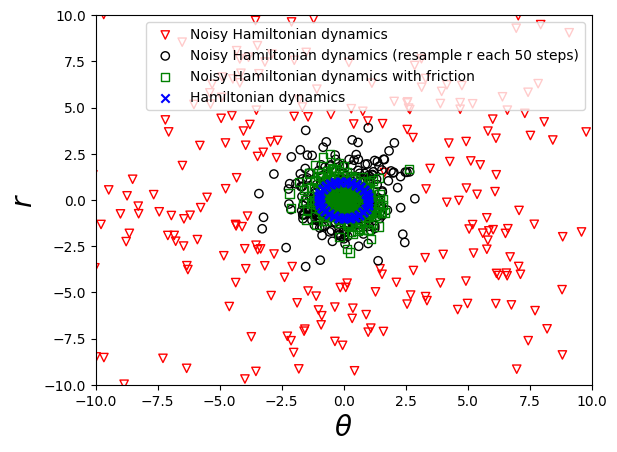

In [11]:
plt.scatter(naive_theta_samples[::50], naive_r_samples[::50], marker="v",
            facecolors='none', edgecolors='red', label="Noisy Hamiltonian dynamics")

plt.scatter(naive_resampled_theta_samples[::50], naive_resampled_r_samples[::50], marker="o",
            facecolors='none', edgecolors='black', label="Noisy Hamiltonian dynamics (resample r each 50 steps)")

plt.scatter(sghmc_theta_samples[::50], sghmc_r_samples[::50], marker="s",
            facecolors='none', edgecolors='green', label="Noisy Hamiltonian dynamics with friction")

plt.scatter(HMC_theta_samples[::50], HMC_r_samples[::50], marker="x",
            color='blue', label="Hamiltonian dynamics")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel(r'$\theta$', fontsize=20)
plt.ylabel(r'$r$', fontsize=20)
plt.legend(loc="upper right")
plt.show()